#  Demo of `PyLie.py` library
_This is a short introduction to `PyLie` a Python module to work with Lie algebras in particle physics_

## I Introduction

`PyLie` is a module that allows the user to carry out various calculation with lie algebras. For the implemented Lie algebras are $A$, $B$, $C$ and $D$ (I actually think that I just forgot to implement the cartan of the other ones). Within `PyLie`, it is possible to manipulate the weights, the roots, construct a system of representation matrix for any _irreducible representation_ (irrep). In addition it is easy to obtain the dimension of a given irrep or its conjugated irrep. Finally, one can obtain the invariants of the products of 2, 3 and 4 irreps (not implemented yet/easy). We now describe the above possibilities in more details and examplify the use of the library.

## II General Structure

`PyLie` is composed of three classes:
* __CartanMatrix__: _represents a cartan matrix of any of the Lie algebra. Contains all the algorithm to construct the matrices._
* __LieAlgebra__: _this is the central class that implements the various actions that can be taken on a Lie algebra. In particular it implements the `invariants`, `dimR`, `conjugateIrrep` and `casimir` functions among others [see section](###III.II-List-Methods-LieAlgebra)_
* __Permutation__: _this class will implement all the relevant operations on the permutation group $S_n$. As of now, it only contains the implementation of the `hookContentFormula`._

For the implementation we rely on the _NumPy_ arrays, the __Sympy__ matrices and sparse matrices as well as the irrational numbers and for the algebraic operations; in particular for the solve\_linear\_systems routine used to find the `invariants` method.

## III List of the Methods and use
This section details all the methods implemented in each one of the classe.

### III.I List Methods CartanMatrix

#### constructor
* __\_\_init\_\_(self, name, Id)__: constructor; takes the name of the desired Lie algebra either in terms of classical Lie algebra $A$, $B$, $C$, $D$ or directly $\mathrm{SU}$, $\mathrm{SO}$ or $\mathrm{SP}$. Id should be the corresponding index e.g. $(\mathrm{SU},n)$ or $(A,n-1)$.

#### Attibutes
* __self.\_name__: the name of the algebra
* __self.\_id__: the id of the algebra
* __self.cartan__: contains the cartan matrix of the algebra. 

#### Public Methods

There is no public method in this class, i.e. the user is not supposed to do anything else that initialize a given Lie algebra.

#### Private Methods

* __\_constructCartanMatrix\___: construct the Cartan matrix of the corresponding algebra. The caran matrix is then stored in the attribute __cartan__.
* __\_fillUpFunctionA\___: basics construction function for the $A$ algebra
* __\_fillUpFunctionB\___: basics construction function for the $B$ algebra
* __\_fillUpFunctionC\___: basics construction function for the $C$ algebra
* __\_fillUpFunctionD\___: basics construction function for the $D$ algebra

### III.II List  Methods LieAlgebra

#### constructor

* __\_\_init(self,cartanMatrix)\_\___: construct the LieAlgebra object from a `CartanMatrix` one. E.g.  `SU2 = LieAlgebra(Cartan("SU",2))`.

#### Attributes

* __self.cartan__: contains the Cartan matrix object.
* __self.cm__: contains the Cartan matrix.
* __self.ncm__: contains the Cartan matrix in numpy form for manipulation.
* __self.proots__: contains the positive roots.
* __self.adjoint__: contains the adjoint representations.

#### Public Methods

* __casimir(irrep)__: returns the quadratic casimir of the corresponding irrep
* __dimR(irrep)__: returns the dimension of the corresponding irrep
* __repsUpToDimN(maxdim)__: returns all the irrep with dimension lower or equal to `maxdim`
* __conjugateIrrep(irrep)__: returns the conjugated irrep
* __repMinimalMatrices(maxW)__: 

    1.  The output of this function is a list of sets of 3 matrices:
    $$\{\{E_1, F_1, H_1\}, \{E_2, F_2, H_2\},...,\{E_n, F_n, H_n\}\}\, ,$$ where n is the group's rank. $H_i$ are diagonal matrices, while $E_i$ and $F_i$ are raising and lowering operators. These matrices obey the Chevalley-Serre relations: $[E_i,\ E_j] = \delta_{ij} H_i,\ [H_i,\ E_j]= A_{ji}E_j,\ [H_i,\ F_j]= -A_{ji}F_j$ and $[H_i,\ H_j]=0$. Here, A is the Cartan matrix of the group/algebra.
    
    2. With the exception of $\mathrm{SU}(2)$ (n=1), these 3n matrices $E_i,\ F_i,\ H_i$ do not generate the Lie algebra, which is bigger, as some raising and lowering operators are missing. However, these remaining operators can be obtained through simple commutations: $[E_i,\ E_j],\ [E_i,\ [E_j,\ E_k]],\dots,[F_i,\ F_j],\ [F_i,\ [F_j,F_k]]$.
    
    3. This method clearly must assume a particular basis for each representation so the results are basis dependent.
    
    4. Also, unlike repMatrices, the matrices given by this function are not Hermitian and therefore they do not conform with the usual requirements of model building in particle physics. However, for some applications, they might be all that is needed.
* __invariants(reps, conj=[])__: returns the all invariants that can be formed with reps.
* __repMatrices(maxW)__: this method returns the complete set of matrices that make up a representation, with the correct casimir and trace normalizations:
    
    1. The matrices $\{M_i\}$ given by this method are in conformity with the usual requirements in particle physics: 
        * $M_a^\dagger = M_a$
        * $Tr(M_a M_b = S(rep)\delta_{ab}$
        * Sum_a M_a M_a = C(rep)
#### Private Methods

__TODO__

### III.III List Methods Permutation

#### Constructor

* __\_\_init(self)\_\___: creates a $S_n$ permutation group object

#### Private Methods

There is no private methods implemented at the moment

#### Public Methods

* __hookContentFormula__: returns the Hook content formula. 
    1. Applies the Hook Content Formula to a semi-standard Young tableau with cells filled with the numbers $0,\dots,n$ (repetitions are allowed) - see reference below.
    2. Recall that a partition $\{\lambda_1,\ \lambda_2, \dots\}$ is associated with a Young tableau where row i contains $\lambda_i$ cells - for example the partition {4,3,1,1} of 9 yields the tableau with 4, 3, 1 and 1 boxes on top of each other.
    3. In a semi-standard Young tableau, the $x_i$ which fill it must increase from top to bottom and must not decrease from left to right.
    4. The number of semi-standard Young tableau given by the partition $\lambda$, where the cell can have any positive integer value smaller or equal to $n$ is given by `hookContentFormula(Lambda, n)`.
    5. The application in model building of this is the following: consider a parameter $M_{f_1,f_2},\ \dots$ where the $f_i =1,\dots,n$ are flavor indices. If $\mu$ is known to have some symmetry (given by a partition $\lambda$) under a permutation of these indices, then the number of degrees of freedom in $\mu$ is given by  `hookContentFormula(Lambda, n)` (see examples below).
    
## IV Examples

We now turn our attention to the practical use of the library. Note that it is be written with `Sympy0.7.6` which is different from the version used in `PyR@TE`, i.e. it will require some extra work to make `PyR@TE` compatible with this version of `Sympy` before being able to use it.

Let's load `PyLie`

### IV.I Imports

In [1]:
import sys
sys.path.insert(0,'/Applications/HEPtools/sympy-0.7.6.1/')
from sympy import *
from PyLie import CartanMatrix, LieAlgebra, Permutation
import operator

In [2]:
init_printing(use_latex=True)

### IV.I Retrieving information on Lie Algebras

Let's start by creating different Cartan matrix and re-assure ourselves that we have the known matrices

In [3]:
SU2C,SU3C,SU4C,SU5C = CartanMatrix("SU", 2), CartanMatrix("SU", 3), CartanMatrix("SU", 4), CartanMatrix("SU", 5)
SO10C = CartanMatrix("SO", 10)

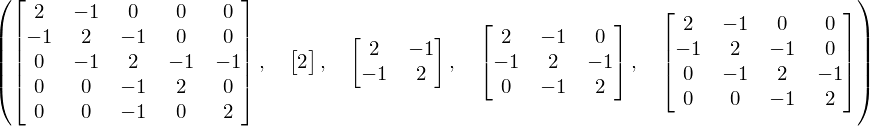

In [4]:
SO10C.cartan,SU2C.cartan,SU3C.cartan,SU4C.cartan,SU5C.cartan

We can now construct the corresponding Lie algebra

In [5]:
SO10,SU2,SU3,SU4,SU5 = map(LieAlgebra, [SO10C,SU2C,SU3C,SU4C,SU5C])

Let's start by looking at the positive roots of SO10 and SU3:

In [6]:
SO10.proots

array([[2, -1, 0, 0, 0],
       [-1, 2, -1, 0, 0],
       [0, -1, 2, -1, -1],
       [0, 0, -1, 2, 0],
       [0, 0, -1, 0, 2],
       [1, 1, -1, 0, 0],
       [-1, 1, 1, -1, -1],
       [0, -1, 1, 1, -1],
       [0, -1, 1, -1, 1],
       [1, 0, 1, -1, -1],
       [-1, 1, 0, 1, -1],
       [-1, 1, 0, -1, 1],
       [0, -1, 0, 1, 1],
       [1, 0, 0, 1, -1],
       [1, 0, 0, -1, 1],
       [-1, 1, -1, 1, 1],
       [1, 0, -1, 1, 1],
       [-1, 0, 1, 0, 0],
       [1, -1, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=object)

In [7]:
SU3.proots

array([[2, -1],
       [-1, 2],
       [1, 1]], dtype=object)

### IV.III Calculating with irreps
Let's look at the different methods to manipulate the irreps
#### Reprensation matrices
* We can start by $\mathrm{SU}(5)$ matrices; note that the result of `repMinimalMatrices` is a list of three matrices $E,F,H$, [see List Methods LieAlgebra](#List-Methods-LieAlgebra)

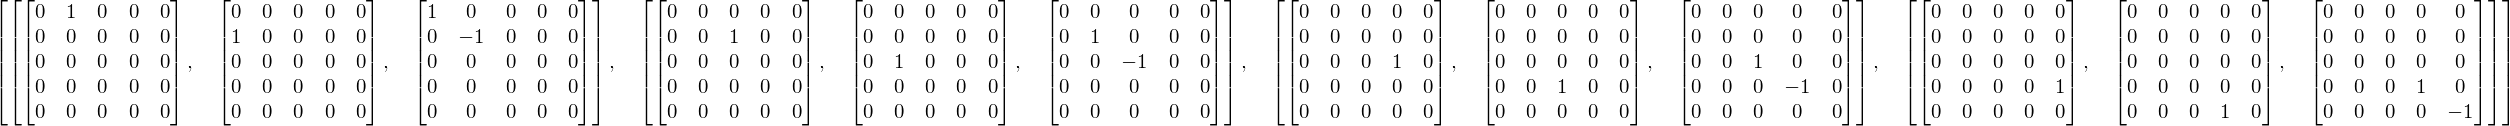

In [8]:
SU5.repMinimalMatrices([1,0,0,0])

Of course we can also get the regular representation matrices

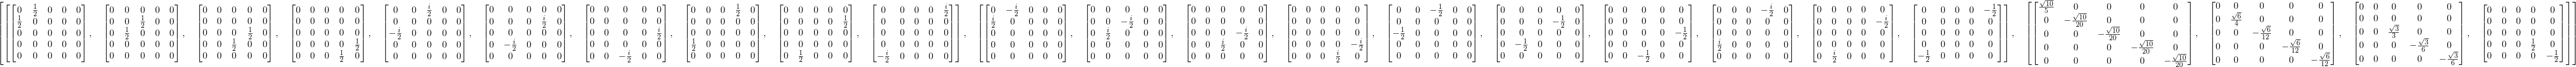

In [9]:
SU5.repMatrices([1,0,0,0])

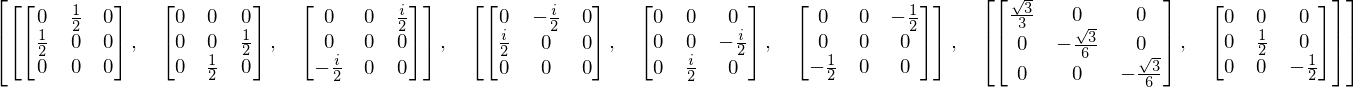

In [10]:
SU3.repMatrices([1,0])

Actually, it is interesting to check that the matrices satisfy the requirement stated above

In [11]:
matsSU3 = sum(SU3.repMatrices([1,0]),[])  # kill one level of parenthesis

In [12]:
[matsSU3[i].is_hermitian for i in range(len(matsSU3))]

[True, True, True, True, True, True, True, True]

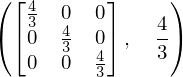

In [13]:
reduce(operator.add,[el.multiply(el) for el in matsSU3]),SU3.casimir([1,0])

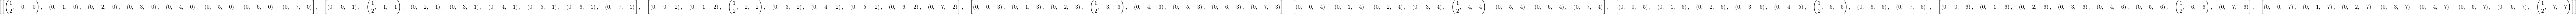

In [14]:
[[((el.multiply(ell)).trace(),iel,iell) for iel,el in enumerate(matsSU3)] for iell,ell in enumerate(matsSU3)]

We see that indeed the product is non zero only on the diagonal i.e. when $i=j$. In addition it is equal to the Dynkin index of the representation as can be checked explicitly

In [15]:
SU3.dynkinIndex([1,0])

#### Dimension

The function `repsUpToDimN` can be used to get the list of irrep with a dimension smaller than $n$

In [16]:
irrepsSO10 = SO10.repsUpToDimN(100)

In [17]:
len(irrepsSO10),irrepsSO10

Let's get the dimension of each one of the irreps:

In [18]:
["{}: {}".format(el,SO10.dimR(el)) for el in irrepsSO10]

['[0, 0, 0, 0, 0]: 1',
 '[1, 0, 0, 0, 0]: 10',
 '[0, 0, 0, 0, 1]: 16',
 '[0, 0, 0, 1, 0]: 16',
 '[0, 1, 0, 0, 0]: 45',
 '[2, 0, 0, 0, 0]: 54']

Note: It looks like there is no irrep with dimensions between 54 and 100.


One can also get the conjugated of a given irrep:

In [19]:
SU5.conjugateIrrep([1,0,1,1])

array([1, 1, 0, 1])

As said above the adjoint of a given Lie algebra is stored in the attribute `adjoint`

In [20]:
[(el.adjoint,el.dimR(el.adjoint)) for el in [SU2,SU3,SU4,SU5,SO10]]

[(array([[2]], dtype=object), 3),
 (array([[1, 1]], dtype=object), 8),
 (array([[1, 0, 1]], dtype=object), 15),
 (array([[1, 0, 0, 1]], dtype=object), 24),
 (array([[0, 1, 0, 0, 0]], dtype=object), 45)]

### IV.IV Invariants
#### Two irreps

In [21]:
SU2.invariants([[1],[1]],conj=[True,False])[0],SU2.invariants([[1],[1]],conj=[True,True])[0]

In [22]:
SU3.invariants([[1,0],[1,0]],conj=[True,False])[0], SU3.invariants([[1,0],[0,1]],conj=[False,False])[0]

In [23]:
SU5.invariants([[1,0,0,0],[0,0,0,1]],conj=[False,False])[0]

In [24]:
SU5.invariants([[1,1,0,0],[0,0,1,1]],conj=[False,False])[0]

#### Three fields

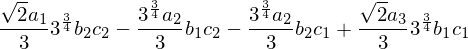

In [25]:
SU2.invariants([[2],[1],[1]],conj=[False,False,False])[0]

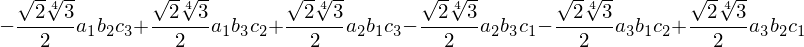

In [26]:
SU3.invariants([[1,0],[1,0],[1,0]],conj=[False]*3)[0]

In [28]:
SU2.invariants([[2],[2]],conj=[False]*2)

In [29]:
SO10.proots

array([[2, -1, 0, 0, 0],
       [-1, 2, -1, 0, 0],
       [0, -1, 2, -1, -1],
       [0, 0, -1, 2, 0],
       [0, 0, -1, 0, 2],
       [1, 1, -1, 0, 0],
       [-1, 1, 1, -1, -1],
       [0, -1, 1, 1, -1],
       [0, -1, 1, -1, 1],
       [1, 0, 1, -1, -1],
       [-1, 1, 0, 1, -1],
       [-1, 1, 0, -1, 1],
       [0, -1, 0, 1, 1],
       [1, 0, 0, 1, -1],
       [1, 0, 0, -1, 1],
       [-1, 1, -1, 1, 1],
       [1, 0, -1, 1, 1],
       [-1, 0, 1, 0, 0],
       [1, -1, 1, 0, 0],
       [0, 1, 0, 0, 0]], dtype=object)

In [30]:
Sn = Permutation()

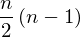

In [33]:
Sn.hookContentFormula([1,1],Symbol('n'))